In [1]:
# Import Libraries
import torch
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import import_ipynb
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'   # Background_color = white (fot matplotlib figures)

In [2]:
class Func_1_Model0(nn.Module):
    def __init__(self, in_size, dense_size_1, dense_size_2, dense_size_3, 
                 dense_size_4, dense_size_5, dense_size_6, dense_size_7, dense_size_8):
        super().__init__()
        # input layer
        self.in_layer = nn.Linear(in_size, in_size)
        # dense layer 1
        self.dense1 = nn.Linear(in_size, dense_size_1)
        # dense layer 2
        self.dense2 = nn.Linear(dense_size_1, dense_size_2)
        # dense layer 3
        self.dense3 = nn.Linear(dense_size_2, dense_size_3)
        # dense layer 4
        self.dense4 = nn.Linear(dense_size_3, dense_size_4)
        # dense layer 5
        self.dense5 = nn.Linear(dense_size_4, dense_size_5)
        # dense layer 6
        self.dense6 = nn.Linear(dense_size_5, dense_size_6)
        # dense layer 7
        self.dense7 = nn.Linear(dense_size_6, dense_size_7)
        # dense layer 8
        self.dense8 = nn.Linear(dense_size_7, dense_size_8)
        
    def forward(self, input_data):
        input_data = input_data.view(input_data.size(0), -1)
        
        # outputs using input layer
        out = self.in_layer(input_data)
        # activation function for input layer
        out = F.leaky_relu(out)
        
        # outputs using dense layer 1
        out = self.dense1(out)
        # activation function for dense layer 1
        out = F.leaky_relu(out)
        
        # outputs using dense layer 2
        out = self.dense2(out)
        # activation function for dense layer 2
        out = F.leaky_relu(out)
        
        # outputs using dense layer 3
        out = self.dense3(out)
        # activation function for dense layer 3
        out = F.leaky_relu(out)
        
        # outputs using dense layer 4
        out = self.dense4(out)
        # activation function for dense layer 4
        out = F.leaky_relu(out)
        
        # outputs using dense layer 5
        out = self.dense5(out)
        # activation function for dense layer 5
        out = F.leaky_relu(out)
        
        # outputs using dense layer 6
        out = self.dense6(out)
        # activation function for dense layer 6
        out = F.leaky_relu(out)
        
        # outputs using dense layer 7
        out = self.dense7(out)
        # activation function for dense layer 7
        out = F.leaky_relu(out)
        
        # predictions using dense layer 8
        out = self.dense8(out)
        return out
 
    def train(self, batch):
        x, y = batch 
        y = y.view(y.size(0), -1)
        out = self(x)                  # Generate predictions
        loss = F.mse_loss(out, y)      # Calculate loss
        return loss
    
    def validate(self, batch):
        x, y = batch 
        y = y.view(y.size(0), -1)
        out = self(x)                    # Generate predictions
        loss = F.mse_loss(out, y)        # Calculate loss
        return {'test_loss': loss}
        
    def validation_end(self, outputs):
        batch_losses = [x['test_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'test_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], test_loss: {:.4f}".format(epoch, result['test_loss']))

In [3]:
class Func_1_Model1(nn.Module):
    def __init__(self, in_size, dense_size_1, dense_size_2, dense_size_3, 
                 dense_size_4, dense_size_5):
        super().__init__()
        # input layer
        self.in_layer = nn.Linear(in_size, in_size)
        # dense layer 1
        self.dense1 = nn.Linear(in_size, dense_size_1)
        # dense layer 2
        self.dense2 = nn.Linear(dense_size_1, dense_size_2)
        # dense layer 3
        self.dense3 = nn.Linear(dense_size_2, dense_size_3)
        # dense layer 4
        self.dense4 = nn.Linear(dense_size_3, dense_size_4)
        # dense layer 5
        self.dense5 = nn.Linear(dense_size_4, dense_size_5)
        
    def forward(self, input_data):
        input_data = input_data.view(input_data.size(0), -1)
        
        # outputs using input layer
        out = self.in_layer(input_data)
        # activation function for input layer
        out = F.leaky_relu(out)
        
        # outputs using dense layer 1
        out = self.dense1(out)
        # activation function for dense layer 1
        out = F.leaky_relu(out)
        
        # outputs using dense layer 2
        out = self.dense2(out)
        # activation function for dense layer 2
        out = F.leaky_relu(out)
        
        # outputs using dense layer 3
        out = self.dense3(out)
        # activation function for dense layer 3
        out = F.leaky_relu(out)
        
        # outputs using dense layer 4
        out = self.dense4(out)
        # activation function for dense layer 4
        out = F.leaky_relu(out)
       
        # predictions using dense layer 5
        out = self.dense5(out)
        return out
 
    def train(self, batch):
        x, y = batch 
        y = y.view(y.size(0), -1)
        out = self(x)                  # Generate predictions
        loss = F.mse_loss(out, y)      # Calculate loss
        return loss
    
    def validate(self, batch):
        x, y = batch 
        y = y.view(y.size(0), -1)
        out = self(x)                    # Generate predictions
        loss = F.mse_loss(out, y)        # Calculate loss
        return {'test_loss': loss}
        
    def validation_end(self, outputs):
        batch_losses = [x['test_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'test_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], test_loss: {:.4f}".format(epoch, result['test_loss']))

In [4]:
class Func_1_Model2(nn.Module):
    def __init__(self, in_size, dense_size_1, dense_size_2):
        super().__init__()
        # input layer
        self.in_layer = nn.Linear(in_size, in_size)
        # dense layer 1
        self.dense1 = nn.Linear(in_size, dense_size_1)
        # dense layer 2
        self.dense2 = nn.Linear(dense_size_1, dense_size_2)
        
    def forward(self, input_data):
        input_data = input_data.view(input_data.size(0), -1)
        
        # outputs using input layer
        out = self.in_layer(input_data)
        # activation function for input layer
        out = F.leaky_relu(out)
        
        # outputs using dense layer 1
        out = self.dense1(out)
        # activation function for dense layer 1
        out = F.leaky_relu(out)
       
        # predictions using dense layer 2
        out = self.dense2(out)
        return out
 
    def train(self, batch):
        x, y = batch 
        y = y.view(y.size(0), -1)
        out = self(x)                  # Generate predictions
        loss = F.mse_loss(out, y)      # Calculate loss
        return loss
    
    def validate(self, batch):
        x, y = batch 
        y = y.view(y.size(0), -1)
        out = self(x)                    # Generate predictions
        loss = F.mse_loss(out, y)        # Calculate loss
        return {'test_loss': loss}
        
    def validation_end(self, outputs):
        batch_losses = [x['test_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'test_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], test_loss: {:.4f}".format(epoch, result['test_loss']))

In [5]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
    
def evaluate(model, val_dl):
    outputs = [model.validate(batch) for batch in val_dl]
    return model.validation_end(outputs)

In [25]:
# Define NN layer sizes for model0
input_size = 1
dense_size_1 = 5
dense_size_2 = 10
dense_size_3 = 10
dense_size_4 = 10
dense_size_5 = 10
dense_size_6 = 10
dense_size_7 = 5
dense_size_8 = 1
model0 = Func_1_Model0(input_size, dense_size_1, dense_size_2, dense_size_3, dense_size_4,
                      dense_size_5, dense_size_6, dense_size_7, dense_size_8).double()

In [26]:
# Define NN layer sizes for model1
input_size = 1
dense_size_1 = 10
dense_size_2 = 18
dense_size_3 = 15
dense_size_4 = 4
dense_size_5 = 1
model1 = Func_1_Model1(input_size, dense_size_1, dense_size_2, 
                       dense_size_3, dense_size_4, dense_size_5).double()

In [27]:
# Define NN layer sizes for model2
input_size = 1
dense_size_1 = 190
dense_size_2 = 1
model2 = Func_1_Model2(input_size, dense_size_1, dense_size_2).double()

In [28]:
model0.load_state_dict(torch.load('HW_1_1_func1model0_v1.pth'))
model1.load_state_dict(torch.load('HW_1_1_func1model1_v1.pth'))
model2.load_state_dict(torch.load('HW_1_1_func1model2_v1.pth'))

<All keys matched successfully>

In [29]:
inputs = np.array([x/7001 for x in range(1,7001)], dtype='double')
array1 = np.sin(5*np.pi*inputs)
array2 = np.array(5*np.pi*inputs)
targets = np.array(array1/array2, dtype='double')

# Convert inputs to tensors
inputs = torch.from_numpy(inputs)

inputs

tensor([1.4284e-04, 2.8567e-04, 4.2851e-04,  ..., 9.9957e-01, 9.9971e-01,
        9.9986e-01], dtype=torch.float64)

In [30]:
# Generate predictions using the models
pred_model0 = model0.forward(inputs.view(inputs.size(0), -1))
pred_model1 = model1.forward(inputs.view(inputs.size(0), -1))
pred_model2 = model2.forward(inputs.view(inputs.size(0), -1))

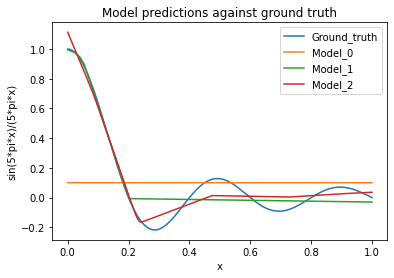

In [32]:
plt.plot(inputs,targets, label="Ground_truth")
plt.plot(inputs, pred_model0.detach().numpy(), label="Model_0")
plt.plot(inputs, pred_model1.detach().numpy(), label="Model_1")
plt.plot(inputs, pred_model2.detach().numpy(), label="Model_2")
plt.xlabel('x')
plt.ylabel('sin(5*pi*x)/(5*pi*x)')
plt.legend(loc="upper right")
plt.title('Model predictions against ground truth')
plt.show();

In [10]:
def loss_from_csv(filename):
    # initializing the titles and rows list
    fields = []
    rows = []
    
    # reading csv file
    with open(filename, 'r') as csvfile:
        # creating a csv reader object
        csvreader = csv.reader(csvfile)
      
        # extracting field names through first row
        fields = next(csvreader)
  
        # extracting each data row one by one
        for row in csvreader:
            rows.append(row)
            
    return rows

In [11]:
model0_losses = loss_from_csv('HW_1_1_func1model0_v1_losses.csv')
model1_losses = loss_from_csv('HW_1_1_func1model1_v1_losses.csv')
model2_losses = loss_from_csv('HW_1_1_func1model2_v1_losses.csv')
model0_losses = [float(x[0]) for x in model0_losses]
model1_losses = [float(x[0]) for x in model1_losses]
model2_losses = [float(x[0]) for x in model2_losses]

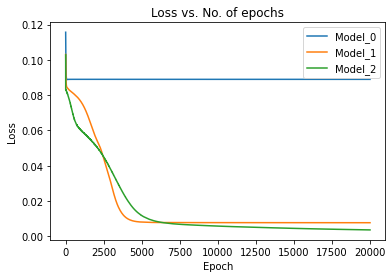

In [12]:
plt.plot(model0_losses, label="Model_0")
plt.plot(model1_losses, label="Model_1")
plt.plot(model2_losses, label="Model_2")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper right")
plt.title('Loss vs. No. of epochs')
plt.show();